In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

from rutas import *

%matplotlib inline

In [3]:
MAX_SAMPLE_SIZE = 4000000
TRAINING_SIZE   = int(MAX_SAMPLE_SIZE * 0.9)

CANT_POSTULADOS = int(MAX_SAMPLE_SIZE * 0.6)
CANT_NO_POSTULADOS = MAX_SAMPLE_SIZE - CANT_POSTULADOS

In [4]:
postulados    = pd.read_csv(RUTA_DATOS_PROCESADOS + 'v3/postulados_v3.csv').sample(n=CANT_POSTULADOS)
no_postulados = pd.read_csv(RUTA_DATOS_PROCESADOS + 'v3/no_postulados_v3.csv').sample(n=CANT_NO_POSTULADOS)

entrenamiento = postulados.append(no_postulados).sample(frac=1).reset_index(drop=True)

In [5]:
y_entrenamiento = entrenamiento['sepostulo']
entrenamiento = entrenamiento.drop(axis=1, labels=['idpostulante', 'idaviso', 'sepostulo'])
X_train, X_test, y_train, y_test = train_test_split(entrenamiento, y_entrenamiento, test_size=0.25, random_state=12)

In [21]:
ada = AdaBoostClassifier(
    base_estimator=ExtraTreesClassifier(
        min_samples_leaf=15,
        n_estimators=8, 
        max_features=4, 
        criterion='entropy', 
        n_jobs=-1, 
        verbose=1,
        random_state=12), 
    n_estimators=15)

In [22]:
ada.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   37.4s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   37.6s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   41.6s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   39.2s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   39.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   43.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   44.4s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    3.0s finished
[Parallel(n_j

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features=4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=-1,
           oob_score=False, random_state=12, verbose=1, warm_start=False),
          learning_rate=1.0, n_estimators=15, random_state=None)

In [23]:
print('Score: ', ada.score(X_test, y_test))

[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]

Score:  0.996435


In [24]:
y_test_predictd = ada.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]

In [25]:
print('ROC AUC: ', roc_auc_score(y_test, y_test_predictd, average='samples'))

ROC AUC:  0.9988552624197282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f572a81fd68>]],
      dtype=object)

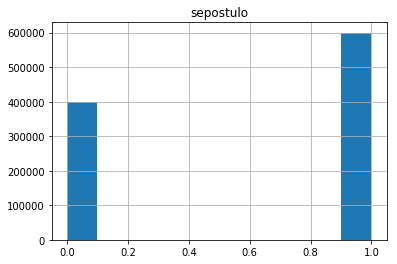

In [26]:
pd.DataFrame(y_test).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f572a847c88>]],
      dtype=object)

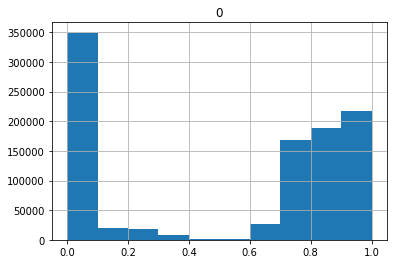

In [27]:
pd.DataFrame(y_test_predictd).hist()

In [28]:
test_o = pd.read_csv(RUTA_DATOS_PROCESADOS + 'v3/kaggle_v3.csv')
test_o.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area,lscore,dist_brc,dist_salta,longevidad,carga,edad,sexo,educacion
0,0,739260,6M9ZQR,0,0,4,0,0,0.066964,30.0,7.000000,1,1.000000,1.400000,-0.0,2.0
1,1,739260,6v1xdL,0,0,0,0,5,0.070028,28.0,6.533333,1,0.902083,1.033333,0.0,0.5
2,2,739260,ezRKm9,0,0,1,0,0,0.034722,30.0,7.000000,1,1.000000,1.200000,-0.0,2.0
3,3,758580,1Q35ej,0,0,0,0,0,0.630872,24.0,5.600000,1,1.000000,2.300000,0.0,2.0
4,4,758580,EAN4J6,0,0,0,0,0,0.862385,30.0,7.000000,1,1.000000,1.066667,-0.0,1.0


In [29]:
#test_o = test_o.drop(axis=1, labels=['cant_vistas', 'cant_vistas_empresa', 'cant_vistas_area','cant_postulaciones_empresa', 'cant_postulaciones_area'])
#test_o = test_o.drop(axis=1, labels=['cant_vistas'])
test_o.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area,lscore,dist_brc,dist_salta,longevidad,carga,edad,sexo,educacion
0,0,739260,6M9ZQR,0,0,4,0,0,0.066964,30.0,7.000000,1,1.000000,1.400000,-0.0,2.0
1,1,739260,6v1xdL,0,0,0,0,5,0.070028,28.0,6.533333,1,0.902083,1.033333,0.0,0.5
2,2,739260,ezRKm9,0,0,1,0,0,0.034722,30.0,7.000000,1,1.000000,1.200000,-0.0,2.0
3,3,758580,1Q35ej,0,0,0,0,0,0.630872,24.0,5.600000,1,1.000000,2.300000,0.0,2.0
4,4,758580,EAN4J6,0,0,0,0,0,0.862385,30.0,7.000000,1,1.000000,1.066667,-0.0,1.0


In [30]:
kaggle_test = test_o.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])
ret = ada.predict_proba(kaggle_test)

[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]

In [31]:
test_o['sepostulo'] = pd.DataFrame(ret)[1]

In [32]:
test_o.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area,lscore,dist_brc,dist_salta,longevidad,carga,edad,sexo,educacion,sepostulo
0,0,739260,6M9ZQR,0,0,4,0,0,0.066964,30.0,7.000000,1,1.000000,1.400000,-0.0,2.0,7.625457e-04
1,1,739260,6v1xdL,0,0,0,0,5,0.070028,28.0,6.533333,1,0.902083,1.033333,0.0,0.5,2.212897e-01
2,2,739260,ezRKm9,0,0,1,0,0,0.034722,30.0,7.000000,1,1.000000,1.200000,-0.0,2.0,8.126894e-04
3,3,758580,1Q35ej,0,0,0,0,0,0.630872,24.0,5.600000,1,1.000000,2.300000,0.0,2.0,4.510943e-05
4,4,758580,EAN4J6,0,0,0,0,0,0.862385,30.0,7.000000,1,1.000000,1.066667,-0.0,1.0,7.015435e-08


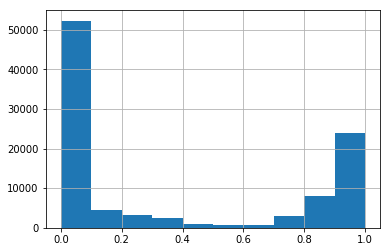

In [33]:
test_o['sepostulo'].hist()

In [34]:
kaggle_output = test_o[['id', 'sepostulo']]
kaggle_output.head()

,id,sepostulo
0,0,7.625457e-04
1,1,2.212897e-01
2,2,8.126894e-04
3,3,4.510943e-05
4,4,7.015435e-08


In [35]:
kaggle_output.to_csv(RUTA_SUBMITS + 'submit-21.csv', index=False)

-- Epoch 1
Norm: 21.46, NNZs: 13, Bias: -9.211685, T: 2499999, Avg. loss: 9.777965
Total training time: 0.88 seconds.


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


-- Epoch 1
Norm: 15.92, NNZs: 13, Bias: -5.446862, T: 2499999, Avg. loss: 0.545744
Total training time: 0.78 seconds.
-- Epoch 1
Norm: 13.05, NNZs: 13, Bias: -4.250945, T: 2500000, Avg. loss: 0.398045
Total training time: 0.79 seconds.
-- Epoch 1
Norm: 11.64, NNZs: 13, Bias: -3.698427, T: 2500000, Avg. loss: 0.280141
Total training time: 0.79 seconds.
-- Epoch 1
Norm: 10.72, NNZs: 13, Bias: -3.375813, T: 2500001, Avg. loss: 0.242739
Total training time: 0.79 seconds.
-- Epoch 1
Norm: 9.94, NNZs: 13, Bias: -3.179324, T: 2500001, Avg. loss: 0.215983
Total training time: 0.81 seconds.


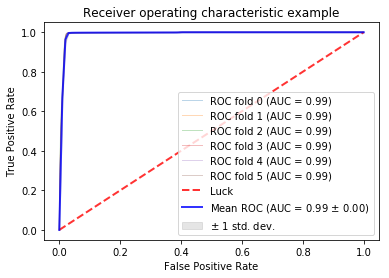

In [9]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier

X = np.array(X_train)
y = np.array(y_train)

n_samples, n_features = X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
#classifier = ExtraTreesClassifier(
#        min_samples_leaf=150,
#        n_estimators=8, 
#        max_features=4, 
#        criterion='entropy', 
#        n_jobs=-1, 
#        verbose=1,
#        random_state=12)
classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, verbose=1, n_jobs=-1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Código anterior adaptado de acá: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py